## Ise 291 project   section : 18

> 📌 name: Abdullah  AL-Qisoom            ID: 202156590 
        
> 📌 name: Amed Aldariwish                ID: 202169010
        
> 📌 name: Ibrahim AL-Mulhim              ID: 202163790
        
> 📌 name: Ammar Almulhim                 ID: 202157830

> 📌 name: Nawaf Althawab                 ID: 202164670

<font size="12">**Data Preparation Part**</font> 

In [1]:
import pandas as pd
#Reading the data
df = pd.read_csv('bike_buyers.csv', delimiter = ',')
display(df.head())
df

ID Marital Status  Gender   Income  Children        Education  \
0  12496        Married  Female  40000.0       1.0        Bachelors   
1  24107        Married    Male  30000.0       3.0  Partial College   
2  14177        Married    Male  80000.0       5.0  Partial College   
3  24381         Single     NaN  70000.0       0.0        Bachelors   
4  25597         Single    Male  30000.0       0.0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region   Age  \
0  Skilled Manual        Yes   0.0        0-1 Miles   Europe  42.0   
1        Clerical        Yes   1.0        0-1 Miles   Europe  43.0   
2    Professional         No   2.0        2-5 Miles   Europe  60.0   
3    Professional        Yes   1.0       5-10 Miles  Pacific  41.0   
4        Clerical         No   0.0        0-1 Miles   Europe  36.0   

  Purchased Bike  
0             No  
1             No  
2             No  
3            Yes  
4            Yes

ID Marital Status  Gender    Income  Children        Education  \
0    12496        Married  Female   40000.0       1.0        Bachelors   
1    24107        Married    Male   30000.0       3.0  Partial College   
2    14177        Married    Male   80000.0       5.0  Partial College   
3    24381         Single     NaN   70000.0       0.0        Bachelors   
4    25597         Single    Male   30000.0       0.0        Bachelors   
..     ...            ...     ...       ...       ...              ...   
995  23731        Married    Male   60000.0       2.0      High School   
996  28672         Single    Male   70000.0       4.0  Graduate Degree   
997  11809        Married     NaN   60000.0       2.0        Bachelors   
998  19664         Single    Male  100000.0       3.0        Bachelors   
999  12121         Single    Male   60000.0       3.0      High School   

         Occupation Home Owner  Cars Commute Distance         Region   Age  \
0    Skilled Manual        Yes   0.0        0-1 Miles         Europe  42.0   
1          Clerical        Yes   1.0        0-1 Miles         Europe  43.0   
2      Professional         No   2.0        2-5 Miles         Europe  60.0   
3      Professional        Yes   1.0       5-10 Miles        Pacific  41.0   
4          Clerical         No   0.0        0-1 Miles         Europe  36.0   
..              ...        ...   ...              ...            ...   ...   
995    Professional        Yes   2.0        2-5 Miles  North America  54.0   
996    Professional        Yes   0.0        2-5 Miles  North America  35.0   
997  Skilled Manual        Yes   0.0        0-1 Miles  North America  38.0   
998      Management         No   3.0        1-2 Miles  North America  38.0   
999    Professional        Yes   2.0        10+ Miles  North America  53.0   

    Purchased Bike  
0               No  
1               No  
2               No  
3              Yes  
4              Yes  
..             ...  
995            Yes  
996            Yes  
997            Yes  
998             No  
999            Yes  

[1000 rows x 13 columns]

In [2]:
#Listing the variables, and their types
non_numeric=df.select_dtypes(include='object').columns
numeric = df.select_dtypes(exclude='object').columns
print("The Numerical Variables are:",numeric)
print()
print("The Categorical Variables are:",non_numeric)

The Numerical Variables are: Index(['ID', 'Income', 'Children', 'Cars', 'Age'], dtype='object')

The Categorical Variables are: Index(['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike'],
      dtype='object')


In [3]:
#Displaying the data to find inconsistencies, missing data and outliers
display(df.info())
print("Variables 'Income', 'Children', 'Cars' and 'Age' should be of type integer instead of float")
print("Variable 'Commute Distance' should be of type int instead of string")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


None

Variables 'Income', 'Children', 'Cars' and 'Age' should be of type integer instead of float
Variable 'Commute Distance' should be of type int instead of string


In [4]:
# First, we need to fill the missing data, or drop the columns containing it. We chose to fill it with mean and mode.
null_columns=df.columns[df.isna().any()]
print("Variables containing Null columns are: ",null_columns)
print()
# Loop over each column that contains null values
for c in null_columns:
    if df[c].dtype!='object':
        # Calculate the mean value of the column
        value = df[c].mean()
    else:
        # Calculate the mode (most frequent value) of the column
        value = df[c].mode()
# The mode() function returns a Series, so we select the first element of the Series
        value = value[0]
# Fill the null values in the column with the calculated mean or mode
    df[c].fillna(value,inplace=True)

display(df)

Variables containing Null columns are:  Index(['Marital Status', 'Gender', 'Income', 'Children', 'Home Owner', 'Cars',
       'Age'],
      dtype='object')



ID Marital Status  Gender    Income  Children        Education  \
0    12496        Married  Female   40000.0       1.0        Bachelors   
1    24107        Married    Male   30000.0       3.0  Partial College   
2    14177        Married    Male   80000.0       5.0  Partial College   
3    24381         Single    Male   70000.0       0.0        Bachelors   
4    25597         Single    Male   30000.0       0.0        Bachelors   
..     ...            ...     ...       ...       ...              ...   
995  23731        Married    Male   60000.0       2.0      High School   
996  28672         Single    Male   70000.0       4.0  Graduate Degree   
997  11809        Married    Male   60000.0       2.0        Bachelors   
998  19664         Single    Male  100000.0       3.0        Bachelors   
999  12121         Single    Male   60000.0       3.0      High School   

         Occupation Home Owner  Cars Commute Distance         Region   Age  \
0    Skilled Manual        Yes   0.0        0-1 Miles         Europe  42.0   
1          Clerical        Yes   1.0        0-1 Miles         Europe  43.0   
2      Professional         No   2.0        2-5 Miles         Europe  60.0   
3      Professional        Yes   1.0       5-10 Miles        Pacific  41.0   
4          Clerical         No   0.0        0-1 Miles         Europe  36.0   
..              ...        ...   ...              ...            ...   ...   
995    Professional        Yes   2.0        2-5 Miles  North America  54.0   
996    Professional        Yes   0.0        2-5 Miles  North America  35.0   
997  Skilled Manual        Yes   0.0        0-1 Miles  North America  38.0   
998      Management         No   3.0        1-2 Miles  North America  38.0   
999    Professional        Yes   2.0        10+ Miles  North America  53.0   

    Purchased Bike  
0               No  
1               No  
2               No  
3              Yes  
4              Yes  
..             ...  
995            Yes  
996            Yes  
997            Yes  
998             No  
999            Yes  

[1000 rows x 13 columns]

In [5]:
#Changing Variables 'Income', 'Children', 'Cars', and 'Age' to integer.
df["Income"]=df["Income"].apply(lambda x: int(x))
df["Children"]=df["Children"].apply(lambda x: int(x))
df["Cars"]=df["Cars"].apply(lambda x: int(x))
df["Age"]=df["Age"].apply(lambda x: int(x))

#Changing the variable 'Commute Distance' to integer.
df["Commute Distance"]=df["Commute Distance"].apply(lambda x: (x.replace(" Miles","")))
df["Commute Distance"]=df["Commute Distance"].apply(lambda x: (x.replace("+","")))
df["Commute Distance"]=df["Commute Distance"].apply(lambda x: int(x[0]) if "-" in x else int(x))

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   int64 
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(6), object(7)
memory usage: 101.7+ KB


None

In [6]:
# Filtering data to exclude values above the upper limit and below the lower limit, effectively removing outliers.
numeric = df.select_dtypes(exclude='object').columns
for variable in numeric:
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5*iqr)
    lower_limit = q1 - (1.5*iqr)
    df = df.loc[(df[variable] < upper_limit) & (df[variable] > lower_limit)]
display(df)

ID Marital Status  Gender  Income  Children        Education  \
0    12496        Married  Female   40000         1        Bachelors   
1    24107        Married    Male   30000         3  Partial College   
2    14177        Married    Male   80000         5  Partial College   
3    24381         Single    Male   70000         0        Bachelors   
4    25597         Single    Male   30000         0        Bachelors   
..     ...            ...     ...     ...       ...              ...   
995  23731        Married    Male   60000         2      High School   
996  28672         Single    Male   70000         4  Graduate Degree   
997  11809        Married    Male   60000         2        Bachelors   
998  19664         Single    Male  100000         3        Bachelors   
999  12121         Single    Male   60000         3      High School   

         Occupation Home Owner  Cars  Commute Distance         Region  Age  \
0    Skilled Manual        Yes     0                 0         Europe   42   
1          Clerical        Yes     1                 0         Europe   43   
2      Professional         No     2                 2         Europe   60   
3      Professional        Yes     1                 5        Pacific   41   
4          Clerical         No     0                 0         Europe   36   
..              ...        ...   ...               ...            ...  ...   
995    Professional        Yes     2                 2  North America   54   
996    Professional        Yes     0                 2  North America   35   
997  Skilled Manual        Yes     0                 0  North America   38   
998      Management         No     3                 1  North America   38   
999    Professional        Yes     2                10  North America   53   

    Purchased Bike  
0               No  
1               No  
2               No  
3              Yes  
4              Yes  
..             ...  
995            Yes  
996            Yes  
997            Yes  
998             No  
999            Yes  

[912 rows x 13 columns]

<font size="12">**Model planning Part**</font> 

In [7]:
#Step3
#Findind the statistical summaries
import pandas as pd

#Loading the CSV file into a pandas DataFrame

# Descriptive Statistics
numeric_cols = df.select_dtypes(exclude='object').columns
categorical_cols = df.select_dtypes(include='object').columns

print(f'Numerical columns are: {numeric_cols.tolist()}')
print()
print(f'Categorical columns are: {categorical_cols.tolist()}')
print()

print("The statistical summary for the numerical variables is:")
display(df[numeric_cols].describe())   #finding the statistical summary for the numerical variables

print("The statistical summary for the categorical variables is:")
display(df[categorical_cols].describe())     #finding the statistical summary for the categorical variables

Numerical columns are: ['ID', 'Income', 'Children', 'Cars', 'Commute Distance', 'Age']

Categorical columns are: ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Region', 'Purchased Bike']

The statistical summary for the numerical variables is:


ID         Income    Children        Cars  Commute Distance  \
count    912.000000     912.000000  912.000000  912.000000        912.000000   
mean   20093.743421   50710.089912    1.865132    1.265351          2.461623   
std     5334.105616   24817.131315    1.608297    0.929918          3.074033   
min    11000.000000   10000.000000    0.000000    0.000000          0.000000   
25%    15379.500000   30000.000000    0.000000    0.000000          0.000000   
50%    20056.500000   50000.000000    2.000000    1.000000          1.000000   
75%    24728.250000   70000.000000    3.000000    2.000000          5.000000   
max    29447.000000  120000.000000    5.000000    3.000000         10.000000   

              Age  
count  912.000000  
mean    43.882675  
std     11.266576  
min     25.000000  
25%     35.000000  
50%     43.000000  
75%     52.000000  
max     74.000000

The statistical summary for the categorical variables is:


Marital Status Gender  Education      Occupation Home Owner  \
count             912    912        912             912        912   
unique              2      2          5               5          2   
top           Married   Male  Bachelors  Skilled Manual        Yes   
freq              489    466        272             252        626   

               Region Purchased Bike  
count             912            912  
unique              3              2  
top     North America             No  
freq              474            469

categorical univariate graph:


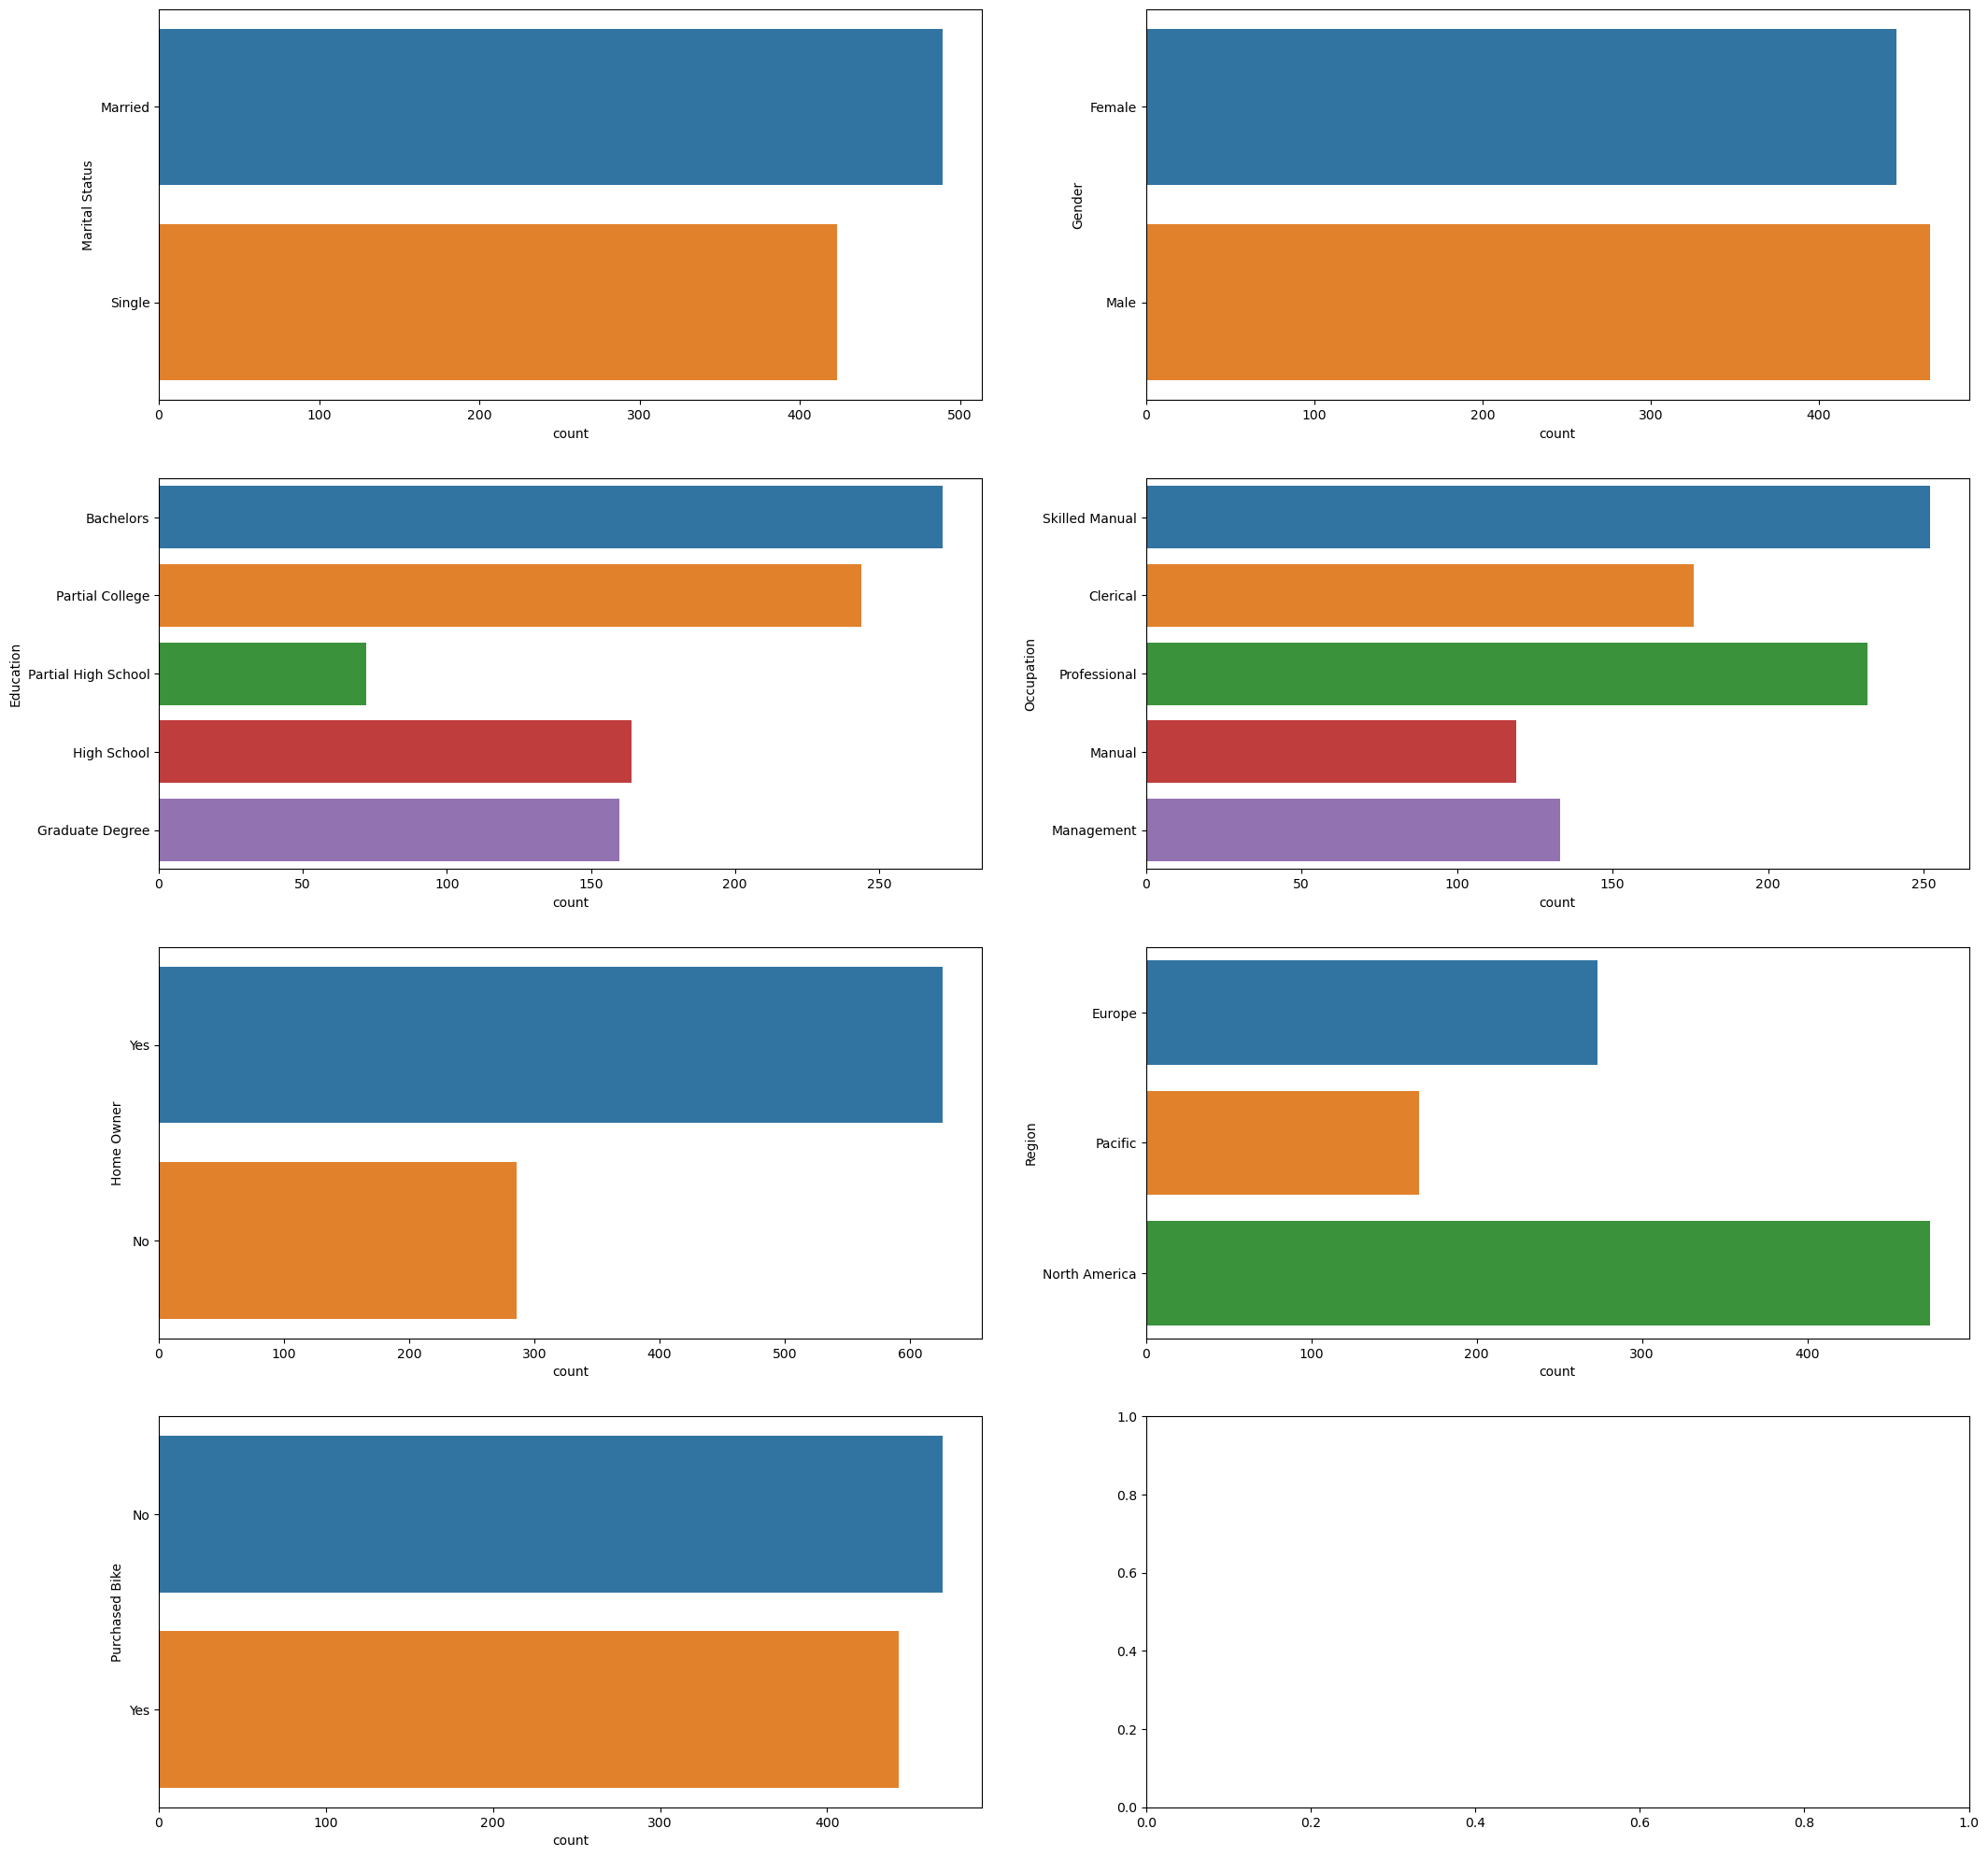

In [8]:
#Step3
#Making univariate graphs (i.e., graphs based on single variable).
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#plotting categorical univariate graph
numeric_cols = df.select_dtypes(exclude='object').columns.drop("ID") #to drop the ID coloumn becuse it does not benefit our work
print("categorical univariate graph:")

fig,axes = plt.subplots(4, 2, figsize=(25,25))
for ind,col in enumerate(categorical_cols):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()


numerical univariate graphs:


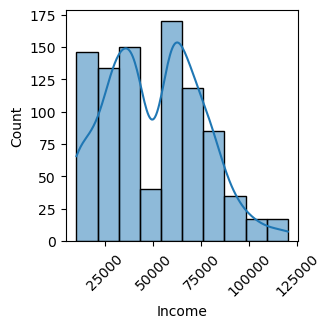

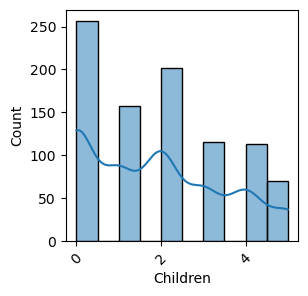

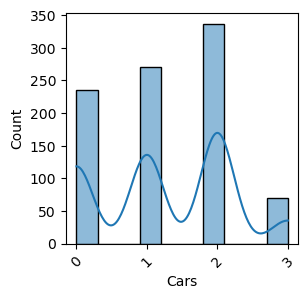

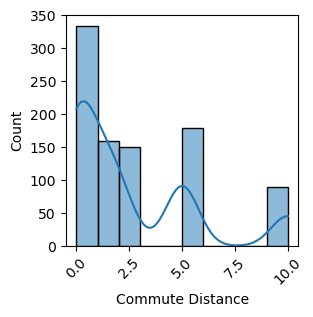

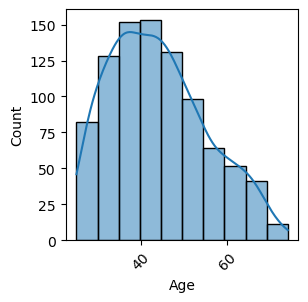

In [9]:
#Step3
#Making univariate graphs (i.e., graphs based on single variable).

#plotting numerical univariate graph
print("numerical univariate graphs:")

for col in numeric_cols:
    plt.figure(figsize=(3,3))
    sns.histplot(x=col,bins=10,kde=True,data=df)
    plt.xticks(rotation=45)
    plt.show()

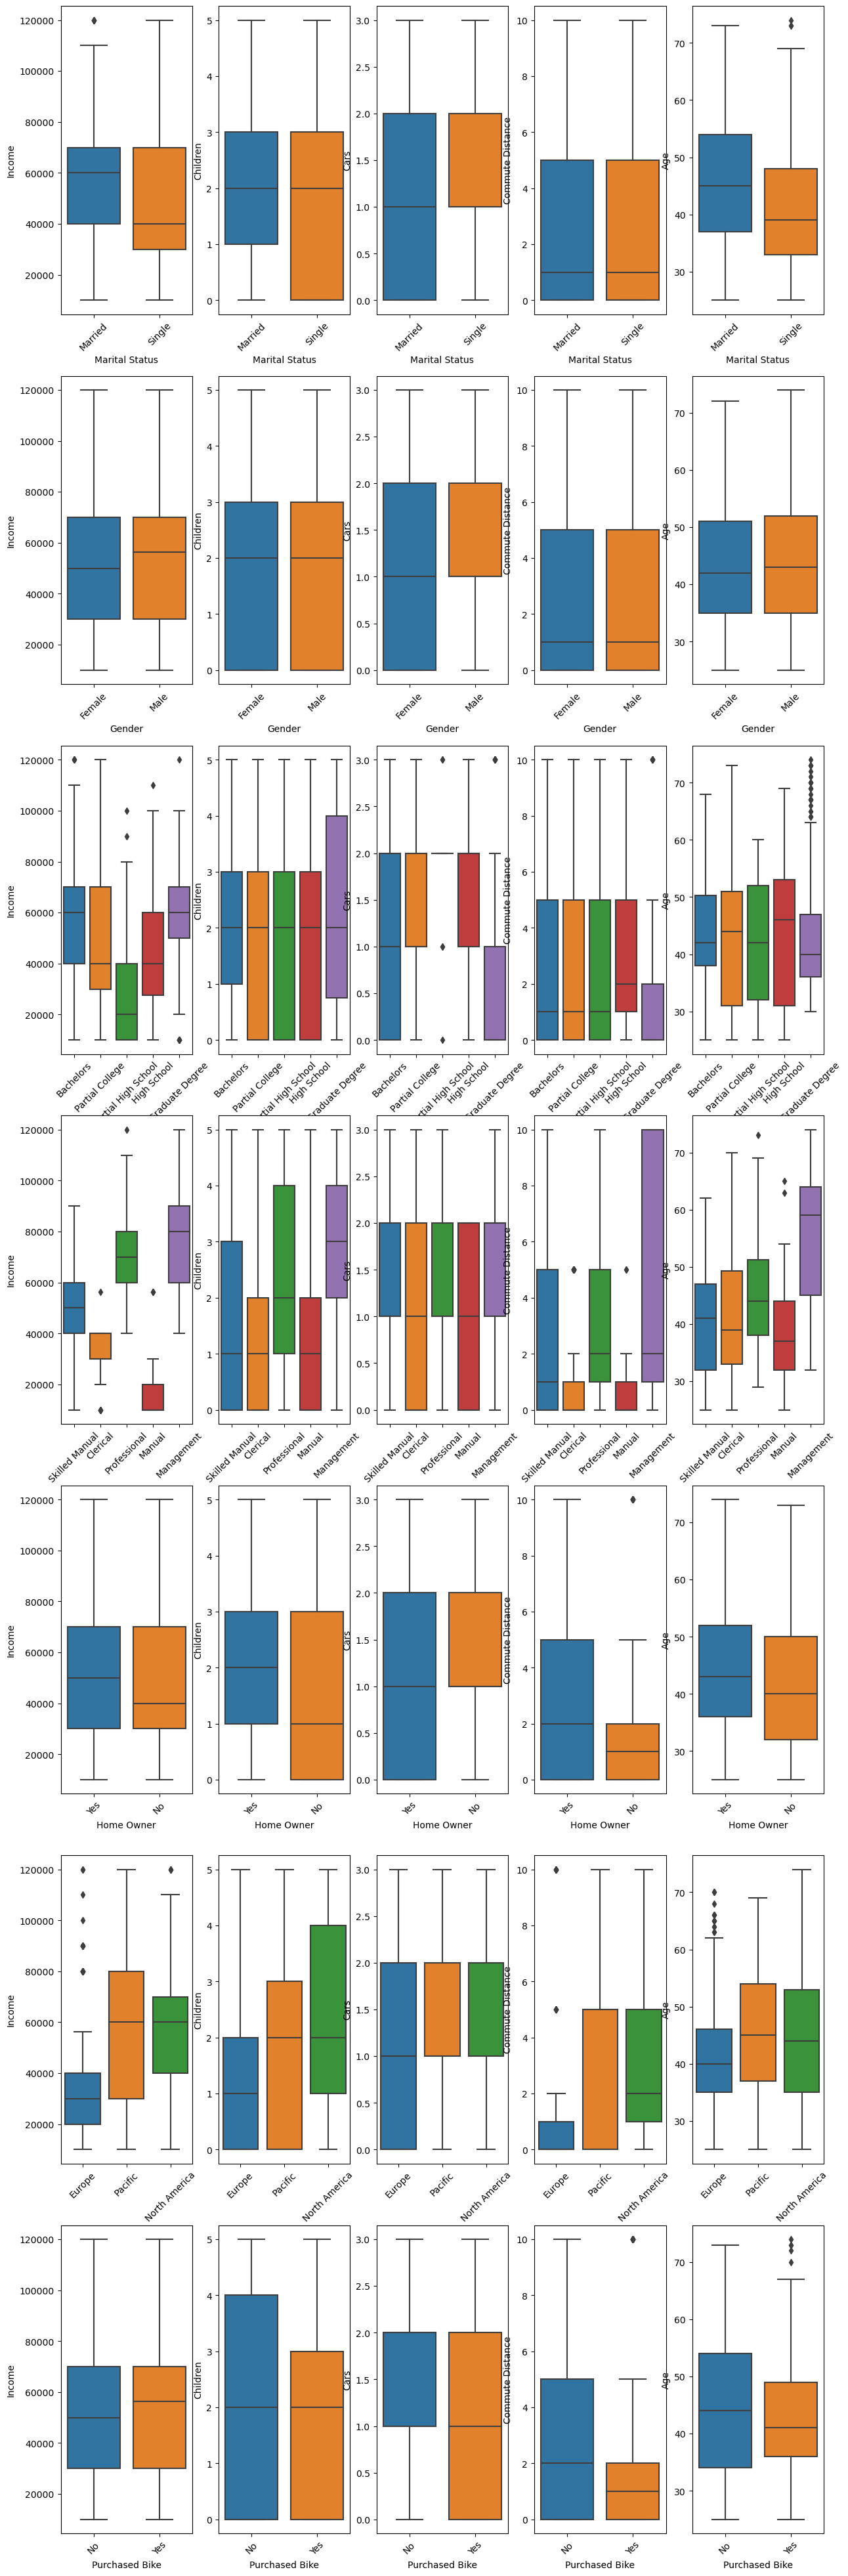

In [10]:
#Step3
#Preparing bivariate plots (i.e., plots based on two variables).
import matplotlib.pyplot as plt
import seaborn as sns
# Select columns in the DataFrame that are of object type (categorical variables)
cat_columns = df.select_dtypes('object').columns
# Exclude the 'ID' column from this selection
num_columns = df.select_dtypes(exclude='object').columns.drop(['ID'])

fig, axes = plt.subplots(len(cat_columns), len(num_columns), figsize=(15, 50))
# Loop over each numerical column
for c, nCol in enumerate(num_columns):
    for r, cCol in enumerate(cat_columns):
        axis = axes[r][c]
        plt.sca(axis)
        plt.xticks(rotation=45)
        sns.boxplot(x=cCol, y=nCol, data=df)

plt.show()


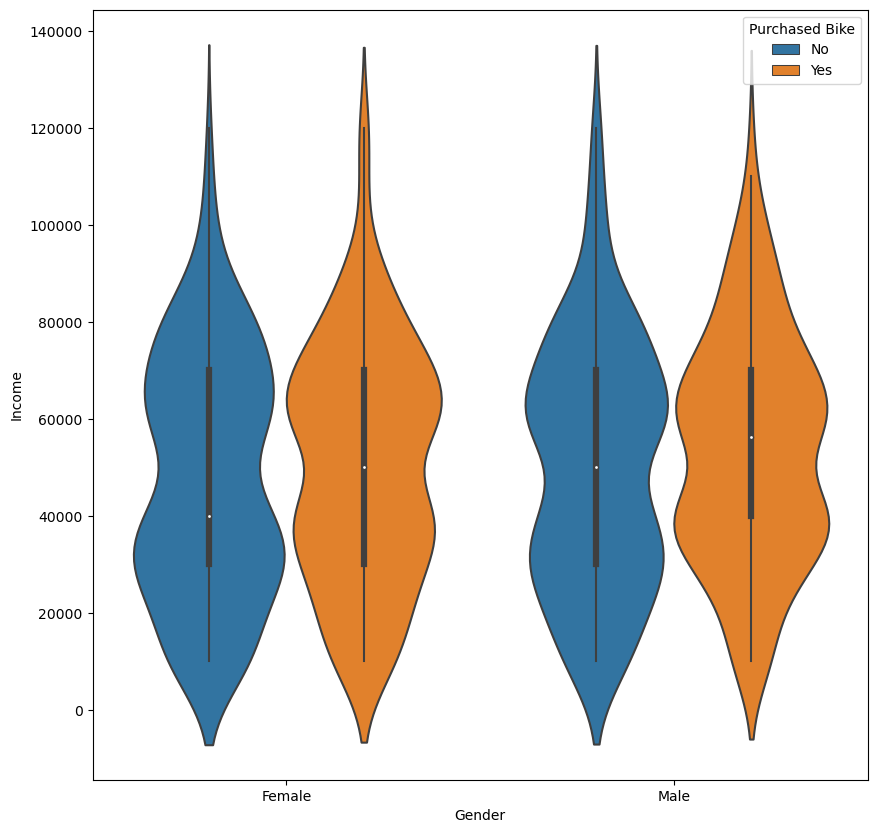

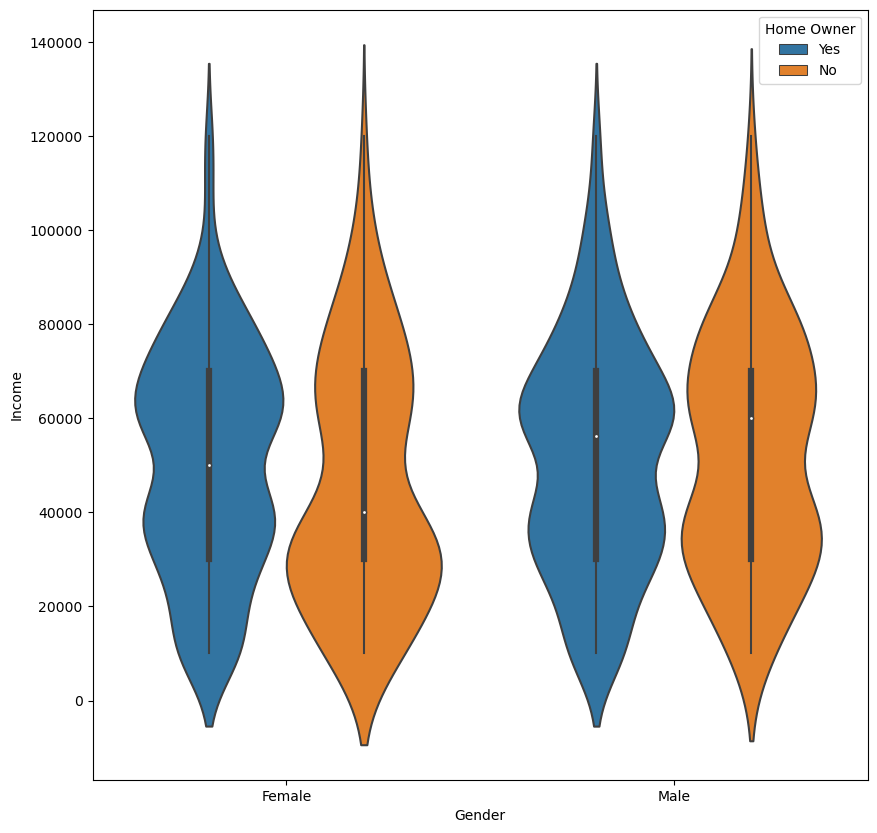

In [11]:
#Portray advanced graphs (i.e., graphs based on more than two variables).
plt.figure(figsize=(10,10))
# 'hue="Purchased Bike"' means that different colors are used for different values of 'Purchased Bike'
sns.violinplot(y="Income",x="Gender",hue="Purchased Bike",data=df)
plt.show()
plt.figure(figsize=(10,10))
sns.violinplot(y="Income",x="Gender",hue="Home Owner",data=df)
plt.show()


In [12]:
#Assessing the relationship between variables.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is our DataFrame after loading the dataset
# Converting tha DataFrame into a new DataFdrame that has just numerical values by the one hot encoding
ndf = pd.get_dummies(df,drop_first=True)
ndf = ndf.drop(['ID'], axis = 1)
 
    
# Calculating the correlation matrix
correlation_matrix = ndf.corr()
# Plotting the correlation matrix
correlation_matrix.style.background_gradient(cmap='coolwarm').format(precision=4)

In [13]:
#Summarising our findings
print("""Our findings can be summarized as follows:

1. The analysis of univariate graphs reveals that a larger proportion of the population does not purchase bikes compared to those who do.
2. The examination of bivariate plots highlights that the age range of bike buyers predominantly falls between 35 and 48 years old.
3. Additionally, the bivariate plots indicate that married individuals tend to have a stronger economic status compared to singles.
4. The advanced graphs demonstrate that the average percentage of female bike buyers surpasses that of non-buyers.
5. The most influential factor in bike purchasing decisions is the presence of cars, as evidenced by a correlation of 23%.

In essence, our study reveals that bike purchases are more prevalent among individuals within a specific age range, 
particularly married individuals with relatively better economic standing. Moreover, the data suggests a higher proportion of female bike buyers compared to non-buyers.
Furthermore, the presence of cars has a significant impact on the likelihood of bike purchases.""")

Our findings can be summarized as follows:

1. The analysis of univariate graphs reveals that a larger proportion of the population does not purchase bikes compared to those who do.
2. The examination of bivariate plots highlights that the age range of bike buyers predominantly falls between 35 and 48 years old.
3. Additionally, the bivariate plots indicate that married individuals tend to have a stronger economic status compared to singles.
4. The advanced graphs demonstrate that the average percentage of female bike buyers surpasses that of non-buyers.
5. The most influential factor in bike purchasing decisions is the presence of cars, as evidenced by a correlation of 23%.

In essence, our study reveals that bike purchases are more prevalent among individuals within a specific age range, 
particularly married individuals with relatively better economic standing. Moreover, the data suggests a higher proportion of female bike buyers compared to non-buyers.
Furthermore, the presence of 

<font size="12">**Model Building**</font> 

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd


# Define a mapping for ordinal features in the 'Education' column
ordinal_mapping= {"Partial High School": 0,  "High School": 1, "Partial College": 2, "Bachelors": 3, "Graduate Degree": 4}
df['Education'] = df['Education'].map(ordinal_mapping)
occupation_scaling = {"Skilled Manual": 0,"Clerical": 1,"Professional": 2,"Manual": 3,"Management": 4}
df['Occupation'] = df['Occupation'].map(occupation_scaling)
# The 'drop_first' parameter is set to True to avoid the dummy variable trap
df = pd.get_dummies(df, columns=['Marital Status', 'Gender', 'Home Owner','Region'],drop_first= True)
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
encoder1.fit(df['Purchased Bike'])
df['Purchased Bike']=encoder1.transform(df['Purchased Bike'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ID                     912 non-null    int64
 1   Income                 912 non-null    int64
 2   Children               912 non-null    int64
 3   Education              912 non-null    int64
 4   Occupation             912 non-null    int64
 5   Cars                   912 non-null    int64
 6   Commute Distance       912 non-null    int64
 7   Age                    912 non-null    int64
 8   Purchased Bike         912 non-null    int32
 9   Marital Status_Single  912 non-null    uint8
 10  Gender_Male            912 non-null    uint8
 11  Home Owner_Yes         912 non-null    uint8
 12  Region_North America   912 non-null    uint8
 13  Region_Pacific         912 non-null    uint8
dtypes: int32(1), int64(8), uint8(5)
memory usage: 72.1 KB


In [15]:
from sklearn.model_selection import train_test_split
# Prepare the feature matrix 'X' by dropping the target variable 'Purchased Bike' and the 'ID' column
X = df.drop(['Purchased Bike', 'ID'], axis=1)
#Prepare the target vector 'y' which is the 'Purchased Bike' column in the dataset
y = df['Purchased Bike']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
# Initialize a DecisionTreeClassifier object
# 'random_state=0' ensures that the splits you generate are reproducible
dt_classifier = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter='best')
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(10, 15), dpi=1000)
# 'dt_classifier' is the trained decision tree model
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), max_depth=2, class_names=['No', 'Yes'])
plt.show()

In [18]:
dt_y_pred =dt_classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
# Calculate the accuracy of the model's predictions
# 'y_test' is the actual target values for the test data
# 'dt_y_pred' is the model's predicted target values
Decision_acc=accuracy_score(y_test, dt_y_pred)
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )

Decision Tree: 

Accuracy:= 0.6788321167883211
Confusion Matrix:= 
 [[ 85  45]
 [ 43 101]]


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
# 'criterion='entropy'' means that the measure of quality of a split is 'entropy'
# 'random_state=0' ensures that the splits you generate are reproducible
rf = RandomForestClassifier(n_estimators=6, criterion='entropy', random_state=0)
# Fit the model to the data
# 'X' is the feature matrix
# 'y' is the target vector
rf = rf.fit(X, y)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=1000)

for index, axis in enumerate(axes.flatten()):
    tree.plot_tree(rf.estimators_[index],
                   feature_names=ndf.columns[0:-1].tolist(),
                   class_names=['no', 'yes'],
                   filled=True,
                   max_depth=2,
                   ax=axis)
# Set the title for the current subplot
    axis.set_title('Estimator: ' + str(index+1), fontsize=11)

plt.show()

In [20]:
rf_y_pred =rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Random forest: \n")
# Calculating the accuracy score of the random forest model
Rf_acc=accuracy_score(y_test, rf_y_pred)
print("Accuracy:=",  accuracy_score(y_test, rf_y_pred))
# Calculating and printing the confusion matrix
print("Confusion Matrix:= \n", confusion_matrix(y_test, rf_y_pred) )

Random forest: 

Accuracy:= 0.948905109489051
Confusion Matrix:= 
 [[125   5]
 [  9 135]]


In [21]:
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes Classifier
NBClf = GaussianNB()
# Train the model using the training sets
NBClf.fit(X_train,y_train)
# Inverse transform the encoded classes to get the original labels
classes=encoder1.inverse_transform([NBClf.classes_[0], NBClf.classes_[1]]).tolist()

print("Class 1:=", NBClf.classes_[0],"\t Class 2:=", NBClf.classes_[1] )
# Predict the response for test dataset
NB_y_pred = NBClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical Data: \n")
NB_acc=accuracy_score(y_test, NB_y_pred)
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )

Class 1:= 0 	 Class 2:= 1
NB for Numerical Data: 

Accuracy:= 0.6240875912408759
Confusion Matrix:= 
 [[ 69  61]
 [ 42 102]]


In [22]:
#Comparing different models based on the performance measures
print("The Accuracy for Decision Tree is\n",Decision_acc,"\n the Accuracy for the random forest is\n",Rf_acc,"\n the Accuracy for Naive Bayes is\n" ,NB_acc)

The Accuracy for Decision Tree is
 0.6788321167883211 
 the Accuracy for the random forest is
 0.948905109489051 
 the Accuracy for Naive Bayes is
 0.6240875912408759


In [23]:
#Interpreting the findings and provide the details of the final selected model.

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, balanced_accuracy_score

print("Random forest: \n")
rf_acc = accuracy_score(y_test, rf_y_pred)
print("Accuracy:=", rf_acc)

conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:= \n", conf_matrix)

sensitivity = recall_score(y_test, rf_y_pred)
print("Sensitivity:", sensitivity)

specificity = balanced_accuracy_score(y_test, rf_y_pred)
print("Specificity:", specificity)

precision = precision_score(y_test, rf_y_pred)
print("Precision:", precision)

balanced_acc = balanced_accuracy_score(y_test, rf_y_pred)
print("Balanced Accuracy:", balanced_acc)


Random forest: 

Accuracy:= 0.948905109489051
Confusion Matrix:= 
 [[125   5]
 [  9 135]]
Sensitivity: 0.9375
Specificity: 0.9495192307692308
Precision: 0.9642857142857143
Balanced Accuracy: 0.9495192307692308


In [24]:
print("""The Random Forest model achieves an impressive accuracy of 94.89%, indicating its ability to accurately predict outcomes
for a majority of cases. It demonstrates a strong sensitivity (93.75%), correctly identifying positive instances. 
Additionally, the model exhibits a high specificity and balanced accuracy of 94.95%, effectively identifying negative 
instances. With a precision of 96.42%, the model accurately predicts positive cases most of the time. 
The balanced accuracy score of 94.95% highlights the model's strong performance across both classes, particularly important when dealing with imbalanced datasets.
The confusion matrix reveals a reliable predictive performance with more true positives and true negatives than false positives and false negatives.
Overall, these metrics indicate that the Random Forest model is robust, reliable, and highly accurate in predicting outcomes for both classes.""")

The Random Forest model achieves an impressive accuracy of 94.89%, indicating its ability to accurately predict outcomes
for a majority of cases. It demonstrates a strong sensitivity (93.75%), correctly identifying positive instances. 
Additionally, the model exhibits a high specificity and balanced accuracy of 94.95%, effectively identifying negative 
instances. With a precision of 96.42%, the model accurately predicts positive cases most of the time. 
The balanced accuracy score of 94.95% highlights the model's strong performance across both classes, particularly important when dealing with imbalanced datasets.
The confusion matrix reveals a reliable predictive performance with more true positives and true negatives than false positives and false negatives.
Overall, these metrics indicate that the Random Forest model is robust, reliable, and highly accurate in predicting outcomes for both classes.


<font size="12">**Communicate results**</font> 

Summary and Conclusion:
Our analysis focused on the 'bike_buyers.csv' dataset to predict bike purchasing behavior. We explored various variables, including marital status, income, education, and occupation, to understand their impact on bike purchase decisions. Our findings revealed a complex interaction among these factors, highlighting the intricate nature of consumer behavior in the bike buying process.

By employing a Random Forest model, we achieved a remarkable accuracy rate of 94.89%. This high accuracy demonstrates the model's effectiveness in capturing the subtle nuances of consumer behavior related to bike purchases. The model's results, including sensitivity and precision, further emphasize the significant influence of both individual economic and demographic factors on purchase patterns.

Possible Future Recommendations:
To enhance our understanding of bike purchasing behavior, we recommend exploring additional datasets that contain supplementary variables. These variables could provide valuable insights into factors such as specific geographical location, seasonality, or previous purchasing history. Incorporating such variables into the analysis would enable a more comprehensive examination of the influencing factors and potentially lead to a more accurate predictive model.

By expanding the scope of the analysis to include these additional variables, we can gain deeper insights into the dynamics of bike purchasing behavior. This, in turn, would provide valuable information for businesses and marketers, allowing them to tailor their strategies and offerings to better meet the preferences and needs of potential bike buyers.

<font size="12">**Operationalize**</font> 

Methodology:

- Finding a dataset that can be work on.
- Identify the problem or the objective of the dataset.
- Get a summary statistical for the dataset.
- Find missing data and clean the data.
- Plot the data and discover the relationships.
- choose the data to be clustered, classified or used regreesion.

Evaluate the Model:

- Run Classification Models: Execute classification models on the dataset.
- Compare Model Accuracy: Assess and compare the accuracy of each model.
- Report Findings and Selected Model: Present the findings and provide details about the chosen model.

Issues faced:

1. Classification can lead to overfitting or underfitting.
2. Imbalanced classes pose a challenge in classification.
3. Numerical data complexity affects the generated model.